<a href="https://colab.research.google.com/github/denniss83/Uzaktan_Calismanin_Zihin_ve_Beden_Sagligi_Uzerindeki_Etkisi_2025_Kuresel_Analiz/blob/main/Uzaktan_%C3%87al%C4%B1%C5%9Fman%C4%B1n_Zihin_ve_Beden_Sa%C4%9Fl%C4%B1%C4%9F%C4%B1_%C3%9Czerindeki_Etkisi_2025_K%C3%BCresel_Analiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lisans
Bu notebook, [Deniz Atabey](https://github.com/denniss83) tarafından hazırlanmıştır.  
Telif Hakkı © 2025 Deniz Atabey  
Bu çalışma [Creative Commons Atıf-GayriTicari 4.0 Uluslararası (CC BY-NC 4.0)](https://creativecommons.org/licenses/by-nc/4.0/) lisansı ile lisanslanmıştır.

- Yalnızca eğitim, akademik ve kişisel kullanım içindir.
- Ticari amaçlarla kullanılamaz.
- Herhangi bir kısmını kullanırsanız lütfen kaynak gösterin.

# 🌍 Uzaktan Çalışmanın Zihin ve Beden Sağlığı Üzerindeki Etkisi:2025 Küresel Analiz Projesi  

---

 Bu çalışma, Haziran 2025'te yayımlanmış küresel anket verisinin analizine dayanmaktadır. Veri, uzaktan, hibrit ve ofis temelli çalışan bireylerin ruhsal ve fiziksel sağlık durumlarını kıyaslamayı amaçlar.


---


**Proje Amacı:**  
- Çalışma modellerinin (Remote – Hybrid – Onsite) bireysel sağlık üzerindeki etkilerini analiz etmek  
- Mental ve fiziksel sağlık göstergeleri üzerinden karşılaştırmalar yapmak  
- Veri görselleştirme ve istatistiksel analiz tekniklerini kullanarak yorumlar sunmak  

---

***Veri Kaynağı:***

- Bu projede kullanılan veri seti, [Kaggle](https://www.kaggle.com/datasets/pratyushpuri/remote-work-health-impact-survey-2025) platformunda Pratyush Puri tarafından yayınlanan
"Remote Work Health Impact Survey 2025" adlı açık veri setinden alınmıştır.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['font.family'] = 'DejaVu Sans'
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline

sns.set(style="whitegrid", palette="Set2", font_scale=1.1)

# Veri Yükleme


In [3]:
from google.colab import files
uploaded = files.upload()

import io
df = pd.read_csv(io.BytesIO(next(iter(uploaded.values()))))

df.head()

Saving remote.csv to remote.csv


,Survey_Date,Age,Gender,Region,Industry,Job_Role,Work_Arrangement,Hours_Per_Week,Mental_Health_Status,Burnout_Level,Work_Life_Balance_Score,Physical_Health_Issues,Social_Isolation_Score,Salary_Range
0,2025-06-01,27,Female,Asia,Professional Services,Data Analyst,Onsite,64,Stress Disorder,High,3,Shoulder Pain; Neck Pain,2,$40K-60K
1,2025-06-01,37,Female,Asia,Professional Services,Data Analyst,Onsite,37,Stress Disorder,High,4,Back Pain,2,$80K-100K
2,2025-06-01,32,Female,Africa,Education,Business Analyst,Onsite,36,ADHD,High,3,Shoulder Pain; Eye Strain,2,$80K-100K
3,2025-06-01,40,Female,Europe,Education,Data Analyst,Onsite,63,ADHD,Medium,1,Shoulder Pain; Eye Strain,2,$60K-80K
4,2025-06-01,30,Male,South America,Manufacturing,DevOps Engineer,Hybrid,65,NaN,Medium,5,NaN,4,$60K-80K


# Terimler Sözlüğü



---

| Terim             | Açıklama                                                                                                                                 |
| ----------------- | ---------------------------------------------------------------------------------------------------------------------------------------- |
| `ADHD`            | Dikkat Eksikliği ve Hiperaktivite Bozukluğu. Dikkat dağınıklığı, dürtüsellik ve aşırı hareketlilik ile karakterizedir.                   |
| `Depression`      | Depresyon. Sürekli mutsuzluk, enerji eksikliği, ilgi kaybı gibi semptomlarla seyreden bir duygu durum bozukluğu.                         |
| `Burnout`         | Tükenmişlik Sendromu. Aşırı iş yükü, duygusal yorgunluk ve motivasyon kaybı ile tanımlanır.                                              |
| `Anxiety`         | Kaygı bozukluğu. Sürekli endişe, huzursuzluk ve stres haliyle karakterize edilir.                                                        |
| `PTSD`            | Travma Sonrası Stres Bozukluğu (Post-Traumatic Stress Disorder). Ağır travmatik bir olay sonrası gelişen uzun süreli stres bozukluğudur. |
| `Stress Disorder` | Genel stres bozukluğu. Uzun süren baskı altında olma durumu, uyku ve odak sorunlarına yol açabilir.|  
| `Remote` | Tamamen uzaktan çalışma. Çalışan, işini fiziksel bir ofise gitmeden evden veya başka bir yerden yürütür. |
| `Hybrid` | Karma model. Haftanın bazı günlerinde ofiste, bazı günlerinde uzaktan çalışma uygulanır.                 |
| `Onsite` | Tam zamanlı ofis çalışması. Çalışan tüm iş günlerini fiziksel iş yerinde geçirir.                        |


# Çalışma Modeli ve Tükenmişlik Analizi


---


- Bu bölümde, çalışanların hangi iş modelinde (uzaktan, hibrit, ofis) çalıştığı ve buna göre **burnout (tükenmişlik)** düzeylerinin dağılımı incelenmiştir.  
- Ayrıca her model için **ortalama iş-yaşam dengesi skoru** karşılaştırılmıştır.  
- Amaç, hangi iş modelinin daha fazla tükenmişlik riski taşıdığını tespit etmektir.



---



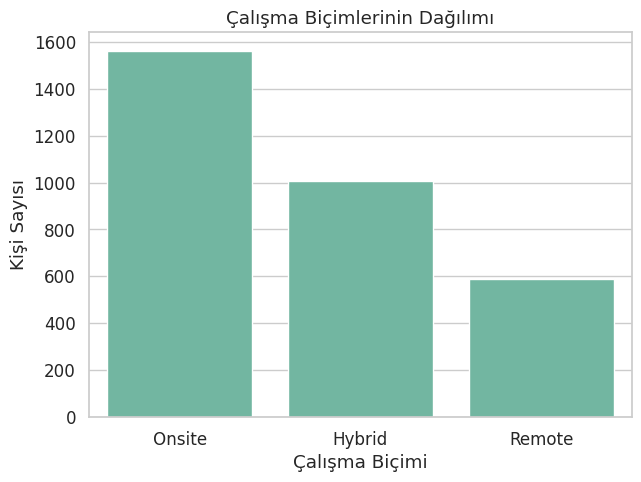

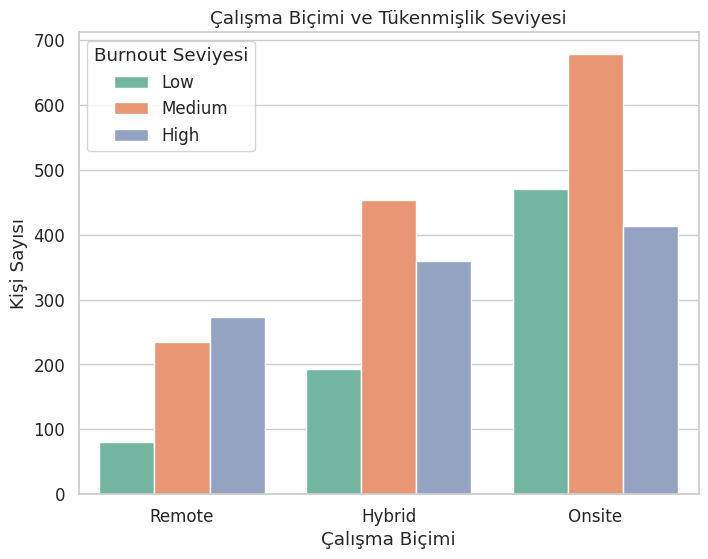

/tmp/ipython-input-4-1892647015.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x='Work_Arrangement', y='Work_Life_Balance_Score', ci='sd', order=['Remote', 'Hybrid', 'Onsite'])


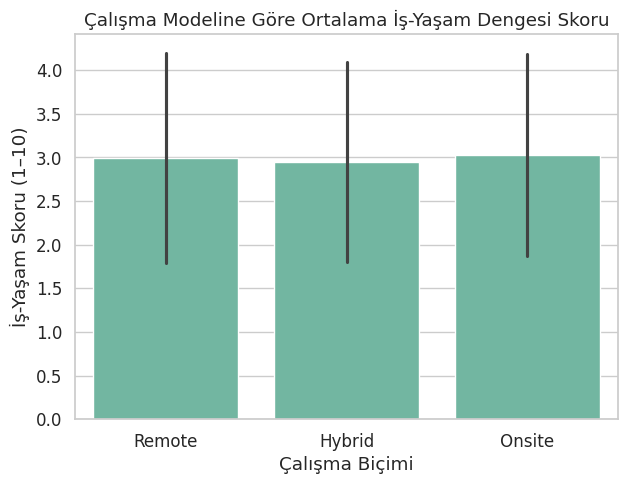

In [4]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='Work_Arrangement', order=df['Work_Arrangement'].value_counts().index)
plt.title("Çalışma Biçimlerinin Dağılımı")
plt.xlabel("Çalışma Biçimi")
plt.ylabel("Kişi Sayısı")
plt.show()

plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Work_Arrangement', hue='Burnout_Level',
              order=['Remote', 'Hybrid', 'Onsite'],
              hue_order=['Low', 'Medium', 'High'])
plt.title("Çalışma Biçimi ve Tükenmişlik Seviyesi")
plt.xlabel("Çalışma Biçimi")
plt.ylabel("Kişi Sayısı")
plt.legend(title="Burnout Seviyesi")
plt.show()

plt.figure(figsize=(7,5))
sns.barplot(data=df, x='Work_Arrangement', y='Work_Life_Balance_Score', ci='sd', order=['Remote', 'Hybrid', 'Onsite'])
plt.title("Çalışma Modeline Göre Ortalama İş-Yaşam Dengesi Skoru")
plt.ylabel("İş-Yaşam Skoru (1–10)")
plt.xlabel("Çalışma Biçimi")
plt.show()


# Zihinsel Sağlık Analizi – Mental_Health_Status


---


- Ankette çalışanların yaşadığı zihinsel sağlık sorunları da sorgulanmıştır.  
- Bu analizde en yaygın sorunlar (örneğin depresyon, stres bozukluğu, ADHD) listelenmiş;  
ve bu sorunların hangi çalışma modelinde daha sık görüldüğü görselleştirilmiştir.  
- Ayrıca herhangi bir sorun bildirip bildirmeme oranı da karşılaştırılmıştır.


---



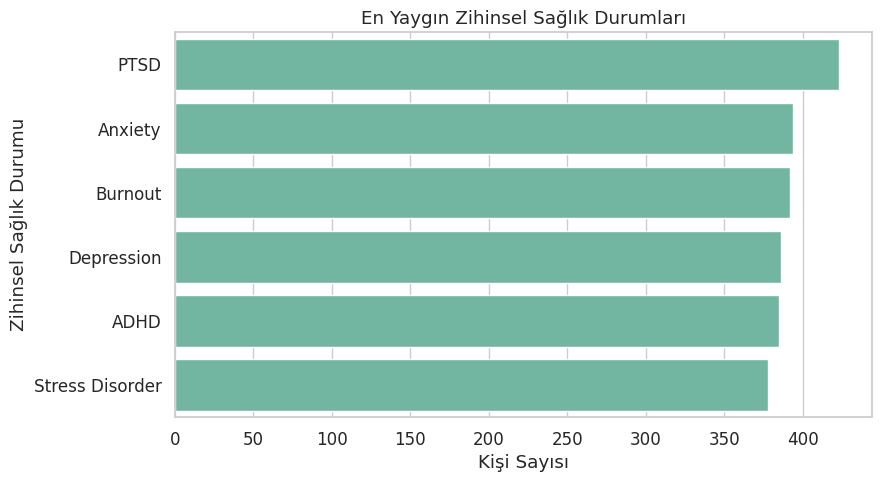

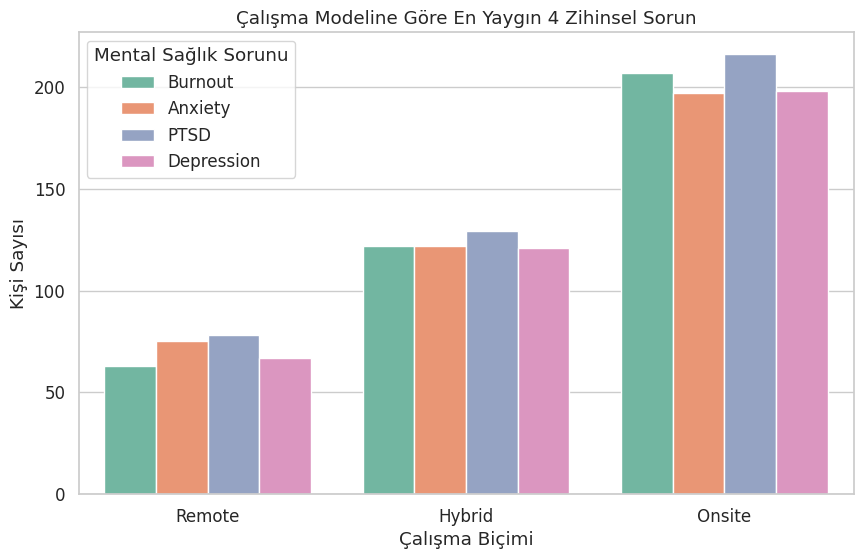

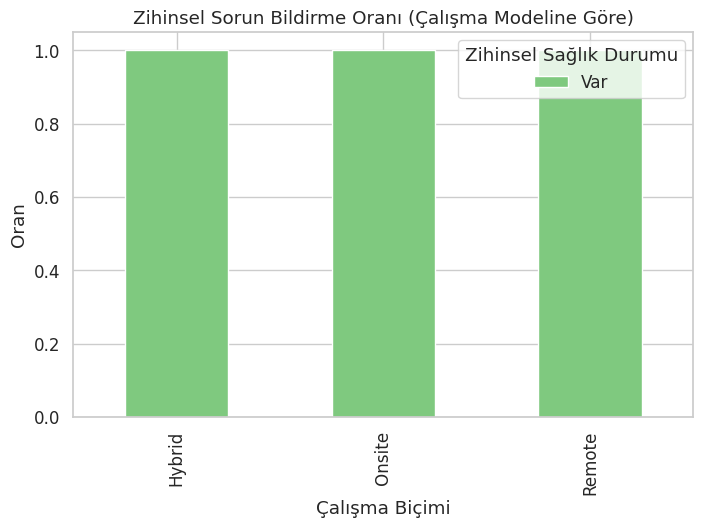

In [5]:
plt.figure(figsize=(9,5))
sns.countplot(data=df, y='Mental_Health_Status', order=df['Mental_Health_Status'].value_counts().head(10).index)
plt.title("En Yaygın Zihinsel Sağlık Durumları")
plt.xlabel("Kişi Sayısı")
plt.ylabel("Zihinsel Sağlık Durumu")
plt.show()

top_mental_issues = df['Mental_Health_Status'].value_counts().head(4).index.tolist()
filtered_df = df[df['Mental_Health_Status'].isin(top_mental_issues)]

plt.figure(figsize=(10,6))
sns.countplot(data=filtered_df, x='Work_Arrangement', hue='Mental_Health_Status',
              order=['Remote', 'Hybrid', 'Onsite'])
plt.title("Çalışma Modeline Göre En Yaygın 4 Zihinsel Sorun")
plt.xlabel("Çalışma Biçimi")
plt.ylabel("Kişi Sayısı")
plt.legend(title="Mental Sağlık Sorunu")
plt.show()

df['Has_Mental_Issue'] = df['Mental_Health_Status'].apply(lambda x: 'Yok' if x == 'None' else 'Var')
mental_counts = df.groupby('Work_Arrangement')['Has_Mental_Issue'].value_counts(normalize=True).unstack()

mental_counts.plot(kind='bar', stacked=True, figsize=(8,5), colormap='Accent')
plt.title("Zihinsel Sorun Bildirme Oranı (Çalışma Modeline Göre)")
plt.ylabel("Oran")
plt.xlabel("Çalışma Biçimi")
plt.legend(title="Zihinsel Sağlık Durumu")
plt.show()

# Fiziksel Sağlık Analizi – Physical_Health_Issues


---


- Çalışanlara sorulan fiziksel sağlık sorunları (göz yorgunluğu, bel ağrısı, boyun ağrısı vb.) çoktan seçmeli şekilde verilmiştir.  
- Bu bölümde, en sık görülen fiziksel rahatsızlıklar belirlenmiş ve **çalışma modeline göre dağılımı** analiz edilmiştir.  
- Uzaktan çalışmanın beden sağlığı üzerindeki etkilerini anlamak hedeflenmiştir.


---



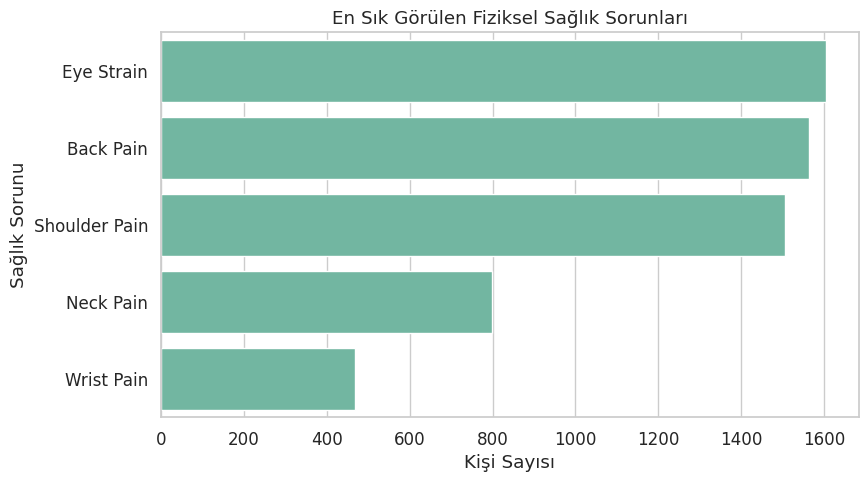

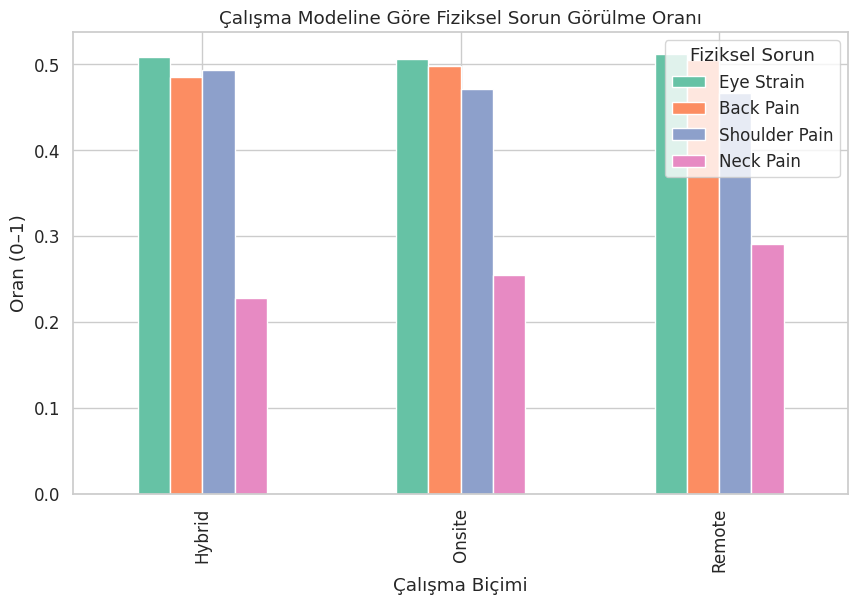

In [6]:
from collections import Counter

all_issues = df['Physical_Health_Issues'].dropna().str.split('; ')
flat_list = [issue for sublist in all_issues for issue in sublist if issue != 'None']
issue_counts = Counter(flat_list)

top_issues = pd.DataFrame(issue_counts.most_common(10), columns=['Issue', 'Count'])

plt.figure(figsize=(9,5))
sns.barplot(data=top_issues, x='Count', y='Issue')
plt.title("En Sık Görülen Fiziksel Sağlık Sorunları")
plt.xlabel("Kişi Sayısı")
plt.ylabel("Sağlık Sorunu")
plt.show()

focus_issues = ['Eye Strain', 'Back Pain', 'Shoulder Pain', 'Neck Pain']
for issue in focus_issues:
    df[issue] = df['Physical_Health_Issues'].fillna('').apply(lambda x: issue in x)

issue_by_model = df.groupby('Work_Arrangement')[focus_issues].mean()

issue_by_model.plot(kind='bar', figsize=(10,6))
plt.title("Çalışma Modeline Göre Fiziksel Sorun Görülme Oranı")
plt.ylabel("Oran (0–1)")
plt.xlabel("Çalışma Biçimi")
plt.legend(title="Fiziksel Sorun")
plt.show()

 # İş-Yaşam Dengesi & Sosyal İzolasyon


---


- Ankette her birey 1–10 arası bir iş-yaşam dengesi ve sosyal izolasyon skoru belirtmiştir.  
- Bu bölümde bu skorların genel dağılımı ve çalışma modeline göre ortalamaları incelenmiştir.  
- Amaç, hangi modelde **daha dengeli ve daha az yalnız hissedilen bir iş ortamı** olduğunu anlamaktır.


---



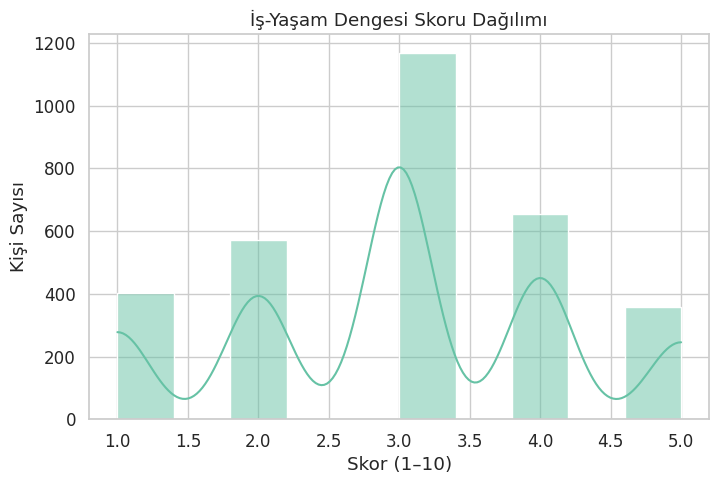

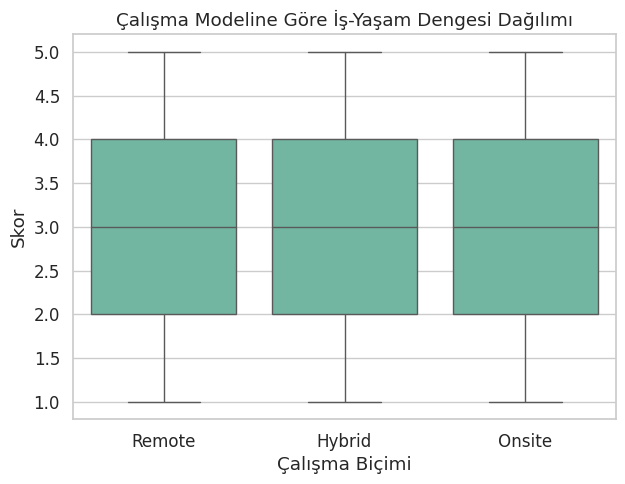

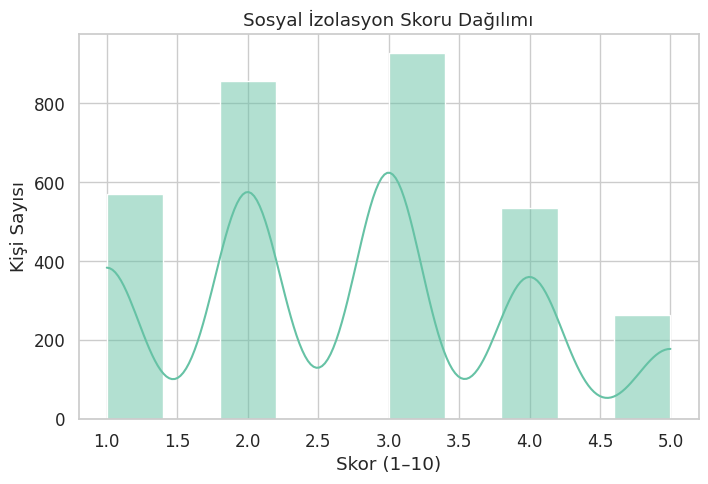

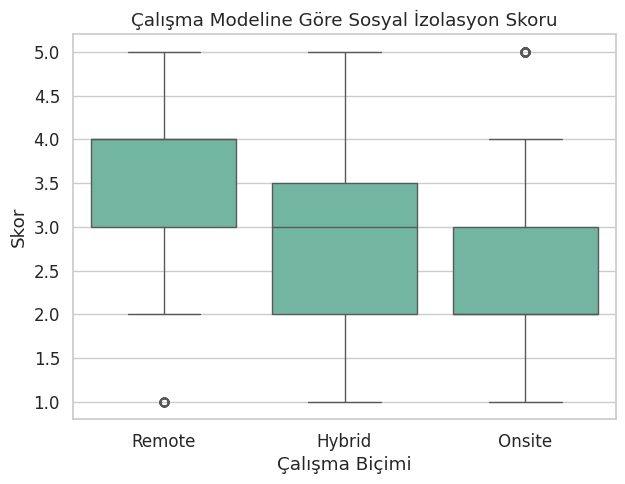

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(df['Work_Life_Balance_Score'], bins=10, kde=True)
plt.title("İş-Yaşam Dengesi Skoru Dağılımı")
plt.xlabel("Skor (1–10)")
plt.ylabel("Kişi Sayısı")
plt.show()

plt.figure(figsize=(7,5))
sns.boxplot(data=df, x='Work_Arrangement', y='Work_Life_Balance_Score', order=['Remote', 'Hybrid', 'Onsite'])
plt.title("Çalışma Modeline Göre İş-Yaşam Dengesi Dağılımı")
plt.xlabel("Çalışma Biçimi")
plt.ylabel("Skor")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df['Social_Isolation_Score'], bins=10, kde=True)
plt.title("Sosyal İzolasyon Skoru Dağılımı")
plt.xlabel("Skor (1–10)")
plt.ylabel("Kişi Sayısı")
plt.show()

plt.figure(figsize=(7,5))
sns.boxplot(data=df, x='Work_Arrangement', y='Social_Isolation_Score', order=['Remote', 'Hybrid', 'Onsite'])
plt.title("Çalışma Modeline Göre Sosyal İzolasyon Skoru")
plt.xlabel("Çalışma Biçimi")
plt.ylabel("Skor")
plt.show()

# Korelasyon Analizi

- Yaş, haftalık çalışma süresi, iş-yaşam dengesi ve sosyal izolasyon skorları arasında bir ilişki olup olmadığı **korelasyon matrisi** ile analiz edilmiştir.  
- Pozitif ya da negatif ilişkiler bu sayede tespit edilebilir.


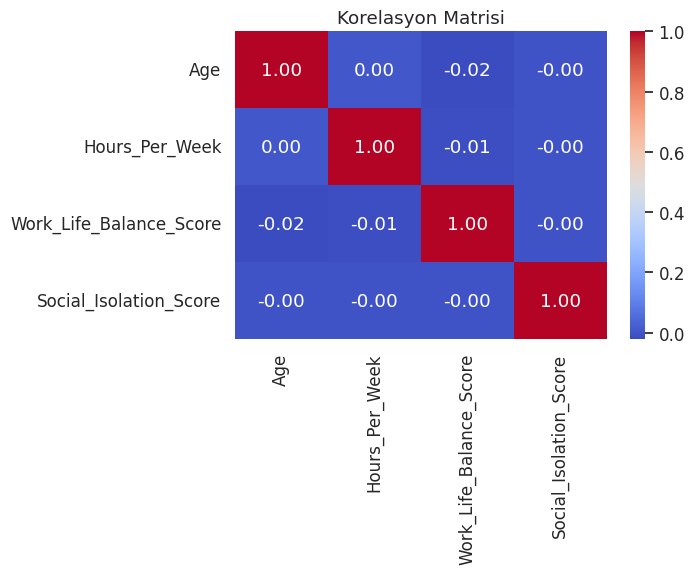

In [8]:
corr_cols = ['Age', 'Hours_Per_Week', 'Work_Life_Balance_Score', 'Social_Isolation_Score']
corr = df[corr_cols].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasyon Matrisi")
plt.show()

 # K-Means ile Çalışan Segmentasyonu


---


- Bu bölümde çalışanlar `yaş`, `çalışma süresi`, `iş-yaşam dengesi` ve `izolasyon skoru` gibi verilerle analiz edilmiştir.  
- Makine öğrenmesi tekniği olan **K-Means algoritması** ile 3 farklı çalışan profili belirlenmiş;  
ve bu kümeler görselleştirilerek anlamlı gruplamalar yapılmıştır.  
- Amaç, benzer özellikteki çalışanları segmentlere ayırarak içgörü elde etmektir.


---



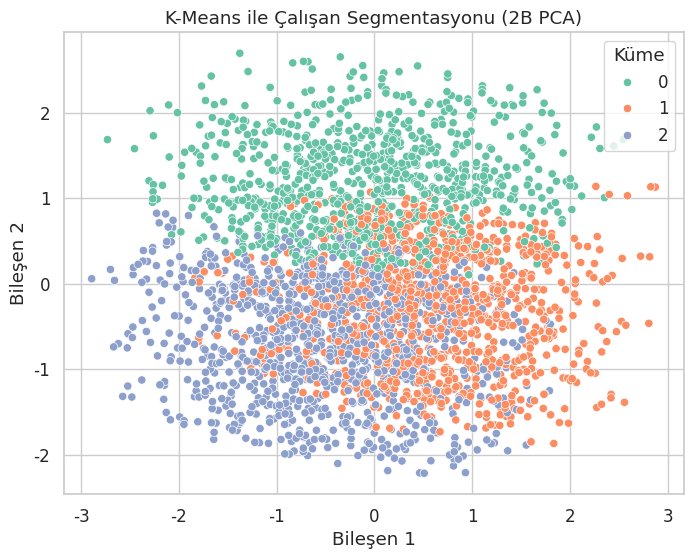

,Age,Hours_Per_Week,Work_Life_Balance_Score,Social_Isolation_Score
Cluster,,,,
0,44.17,48.15,2.77,4.09
1,42.91,42.23,3.34,2.03
2,44.14,58.36,2.86,2.22


In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = ['Age', 'Hours_Per_Week', 'Work_Life_Balance_Score', 'Social_Isolation_Score']
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title("K-Means ile Çalışan Segmentasyonu (2B PCA)")
plt.xlabel("Bileşen 1")
plt.ylabel("Bileşen 2")
plt.legend(title="Küme")
plt.show()

df.groupby('Cluster')[features].mean().round(2)

# Sonuç ve Öneriler



---



Bu analiz, uzaktan ve hibrit çalışma modellerinin hem zihinsel hem de fiziksel sağlık üzerinde ciddi etkiler yaratabileceğini göstermektedir.  
İşverenlerin bu içgörüler ışığında daha sürdürülebilir ve sağlıklı çalışma politikaları geliştirmesi kritik önemdedir.  
Bu proje, veri bilimi ile iş dünyası arasında köprü kurarak somut çözüm önerileri sunmayı hedeflemektedir.


---

